In [1]:
%matplotlib inline

In [2]:
import numpy as np
import time
import re
import pandas as pd
import requests
import argparse

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib.finance import candlestick2_ohlc

import matplotlib.dates as mdates
import datetime as dt
    


/srv/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
period = 3600
#cryptowat.ch supported periods
#60	1m
#180	3m
#300	5m
#900	15m
#1800	30m
#3600	1h
#7200	2h
#14400	4h
#21600	6h
#43200	12h
#86400	1d
#259200	3d
#604800	1w


after = 1522119148

resp = requests.get(
  "https://api.cryptowat.ch/markets/{}/{}/ohlc?after={}&periods={}".format(
    "bitfinex", "btcusd", after, period))

resp = resp.json()
#print(resp)

resp = resp["result"][str(period)]

all_candles = []
for c in resp:
  all_candles.append(
      {"Date": dt.datetime.fromtimestamp((c[0])),
       "Open": float(c[1]), "High": float(c[2]), "Low": float(c[3]),
       "Close": float(c[4])})

df = pd.DataFrame(all_candles)
df = df.set_index(["Date"])
#df.head()

# total ticks in df
len(df)

72

In [4]:

#Reset the index to remove Date column from index
df_ohlc = df.reset_index()

#Naming columns
df_ohlc.columns = ["Date","Open","High",'Low',"Close"]

#Converting dates column to float values
df_ohlc["Date"] = df_ohlc["Date"].map(mdates.date2num)


No handles with labels found to put in legend.


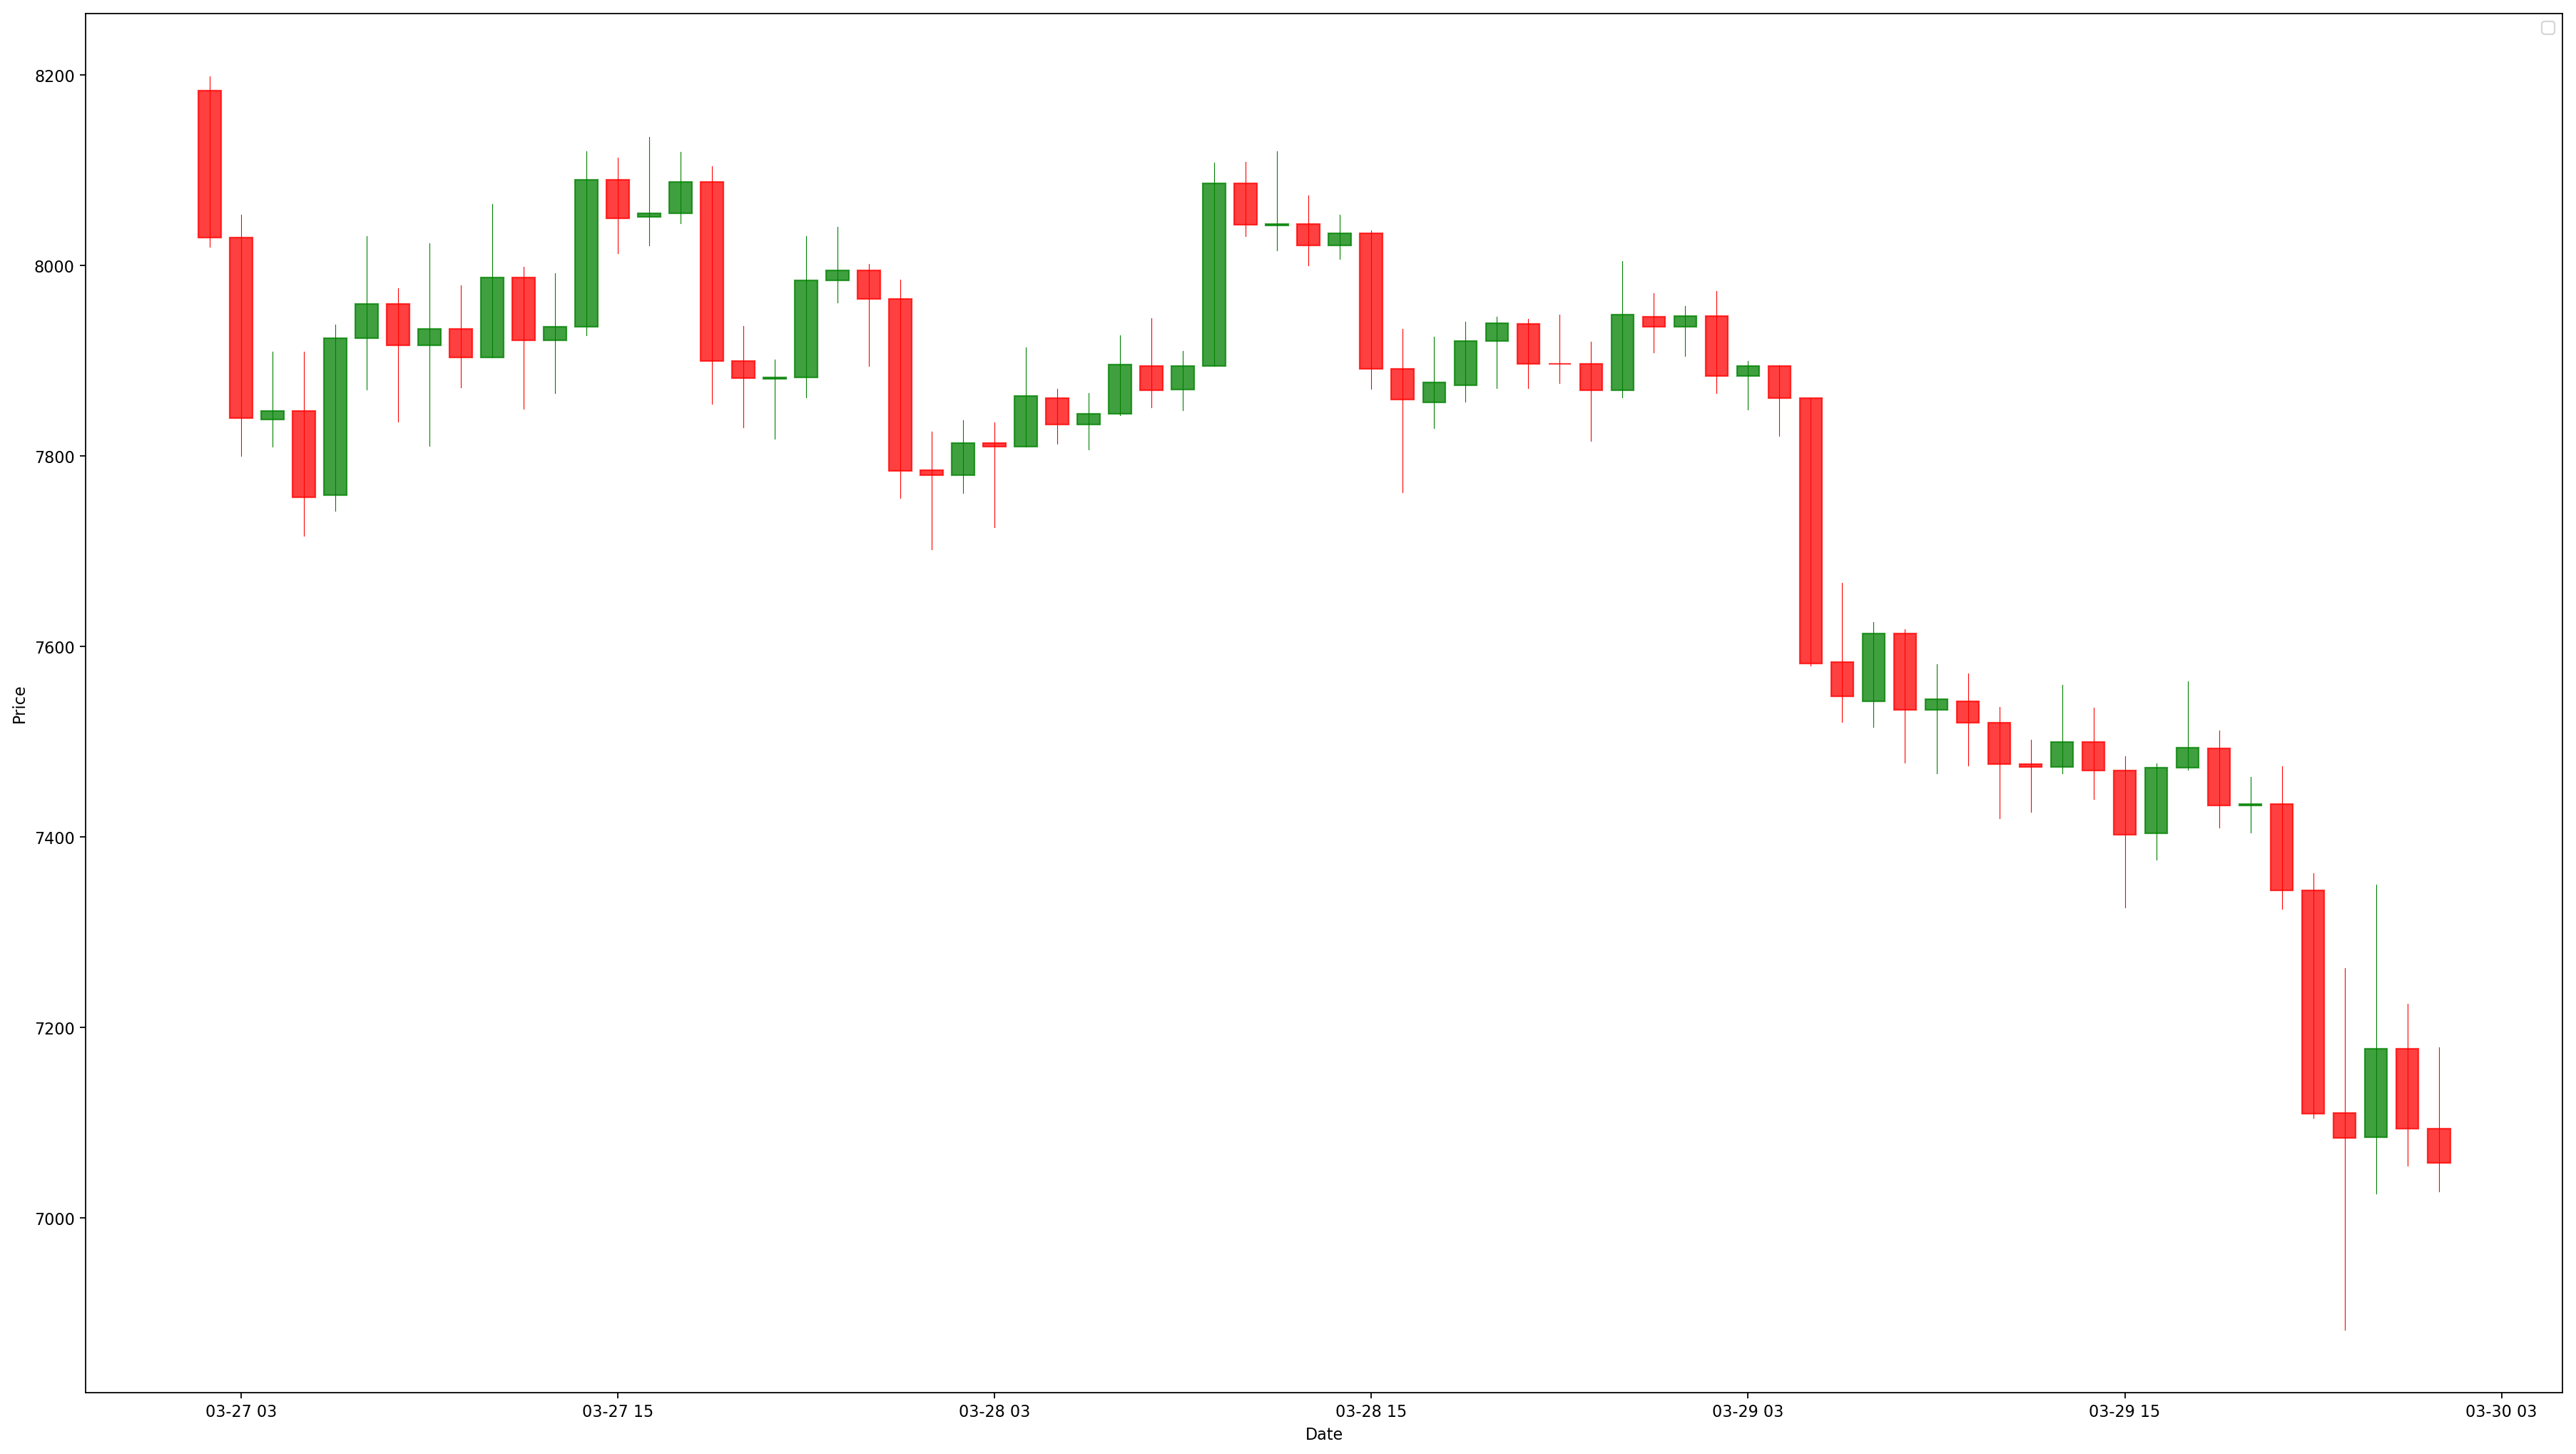

In [11]:
# setup plot demensions etc.
plt.figure(figsize=(28, 16), dpi= 160, facecolor='w', edgecolor='k')
ax1 = plt.subplot2grid((60,1), (0,0), rowspan=60, colspan=1)

#Converts raw mdate numbers to dates
ax1.xaxis_date()

#Making candlestick plot
candlestick_ohlc(ax1,df_ohlc.values,width=0.03, colorup='r', colordown='g',alpha=0.75)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()


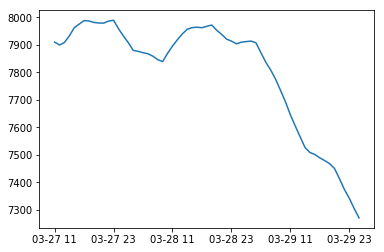

In [6]:
# calc simple moving average and plot
short_rolling = df['Close'].rolling(window=10).mean()
short_rolling.head(50)
plt.plot(short_rolling)

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


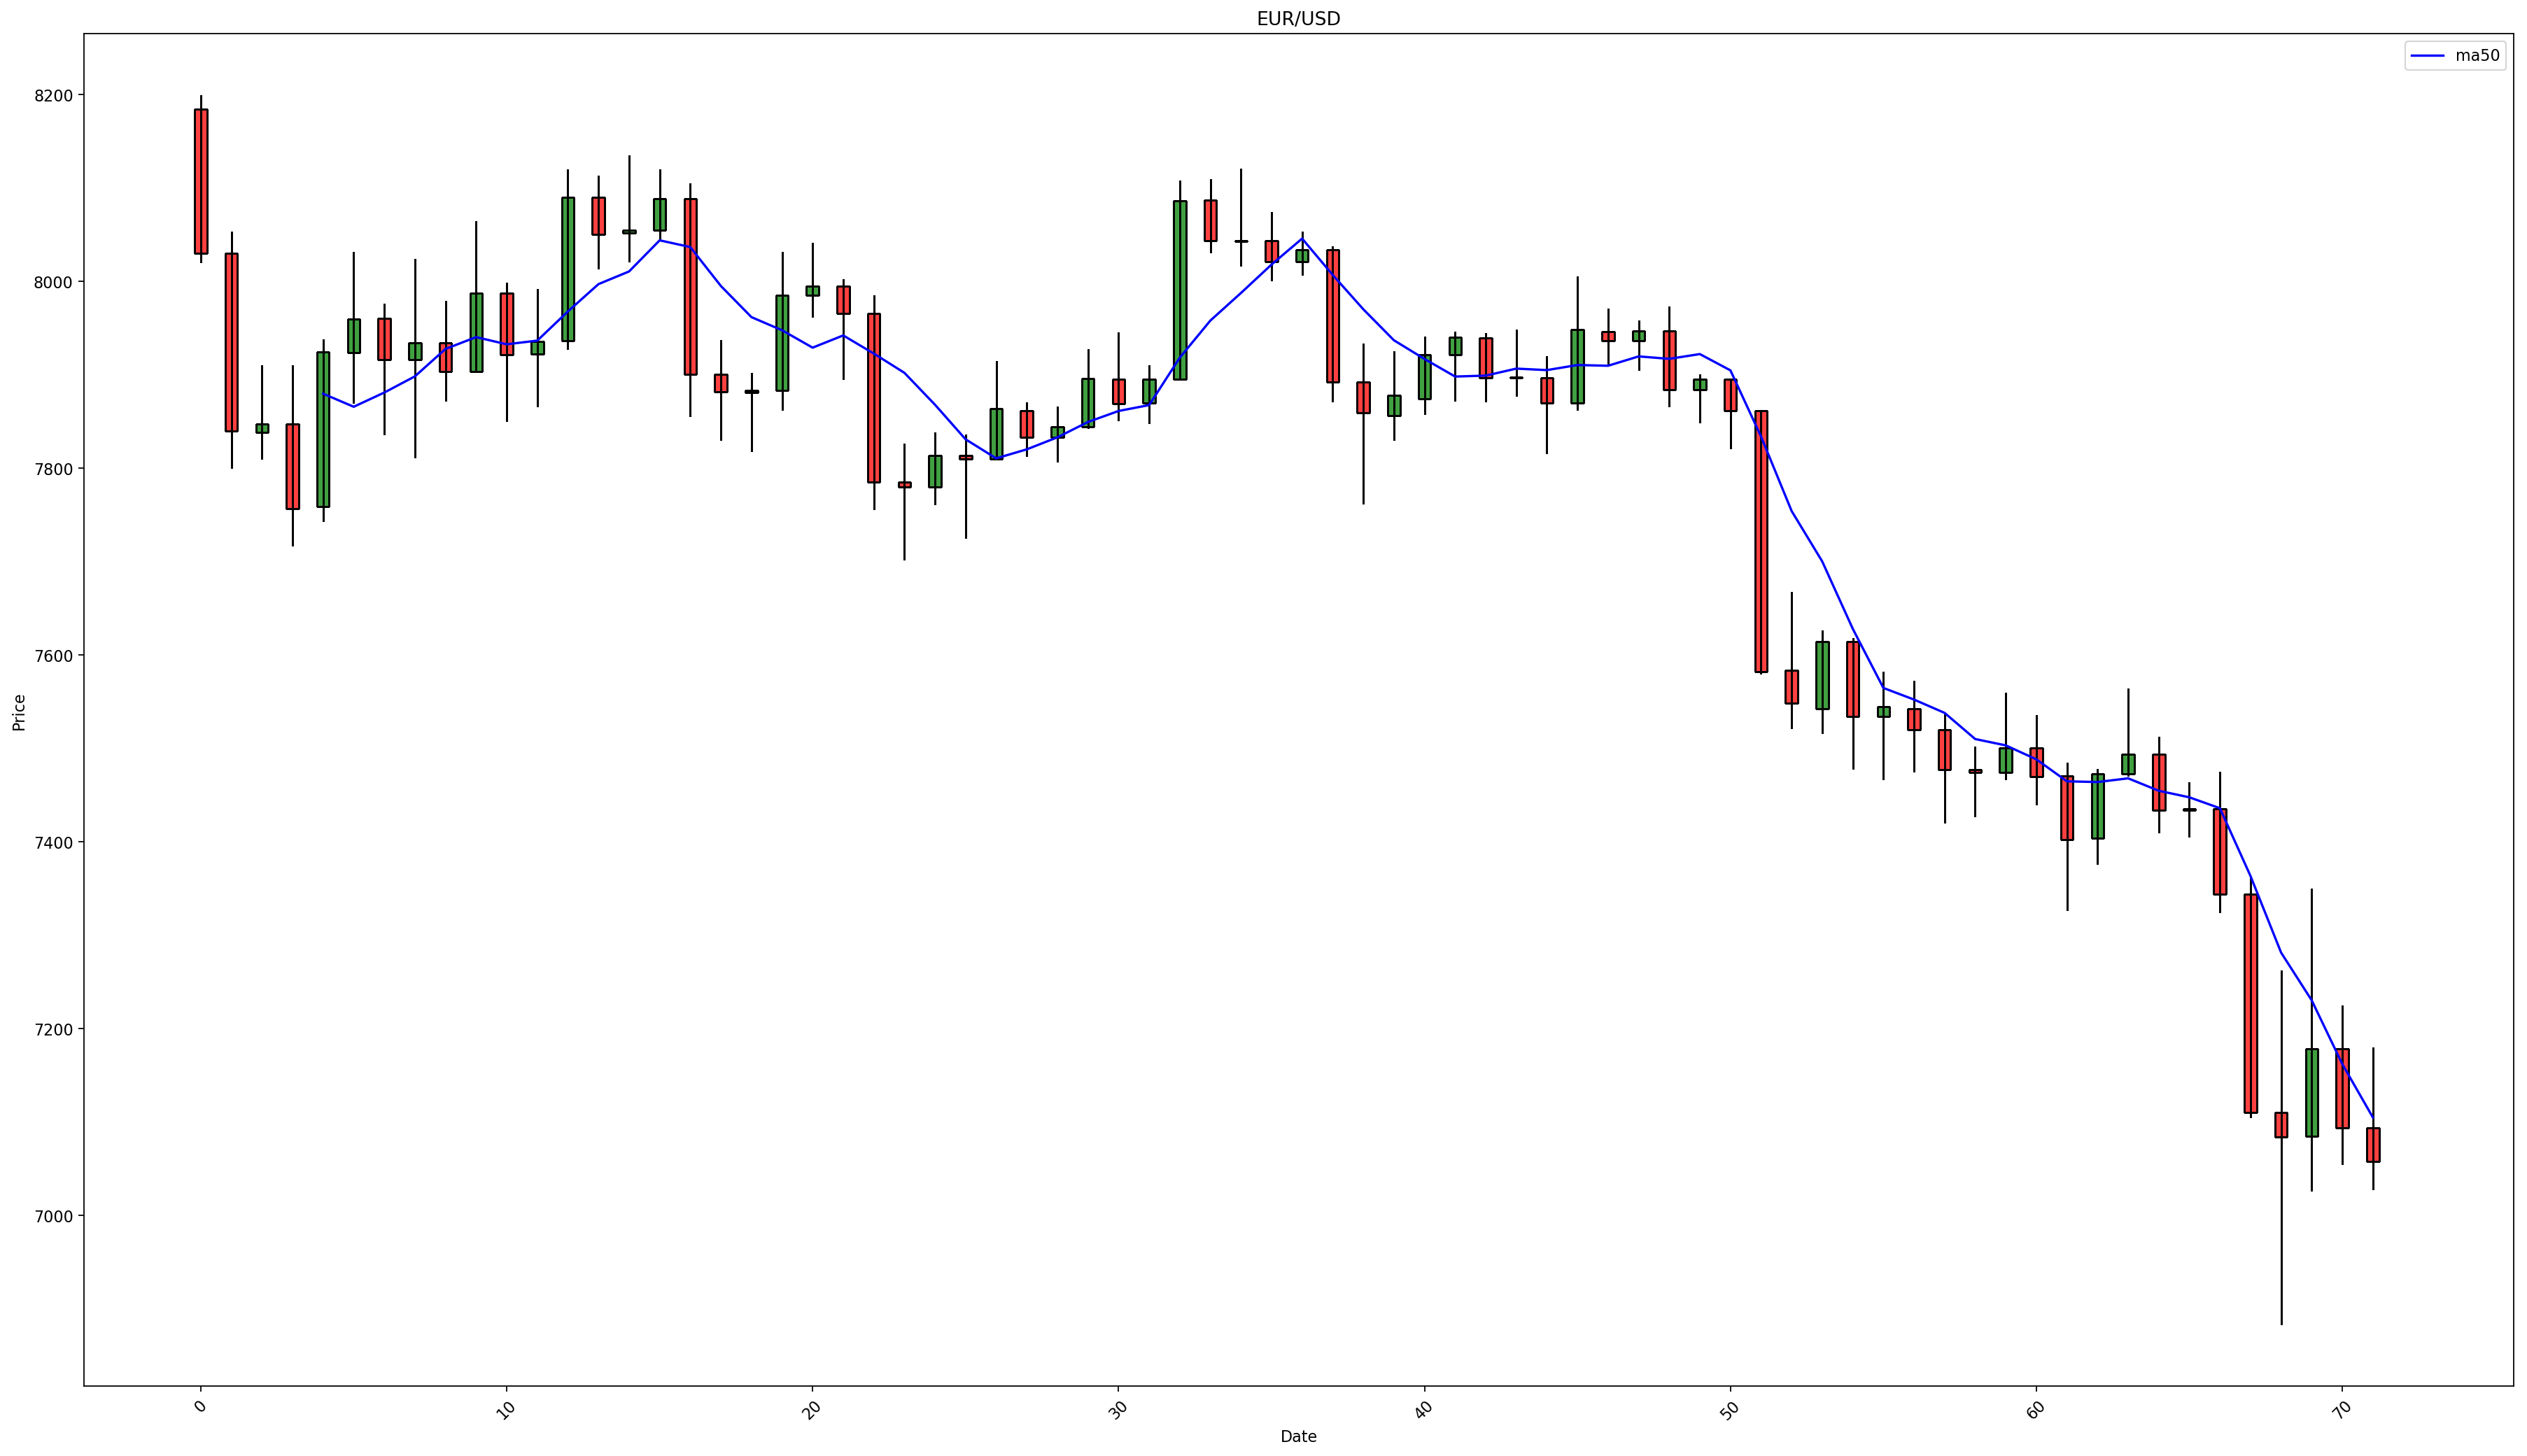

In [13]:

df.reset_index(inplace=True)
madf = df["Close"].rolling(5).mean()

plt.figure(figsize=(28, 16), dpi= 160, facecolor='w', edgecolor='k')
ax =  plt.subplot2grid((60,1), (0,0), rowspan=60, colspan=1)
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("EUR/USD")


ohlc = df[['Date','Open','High','Low','Close']]
ohlc["Date"] = ohlc["Date"].map(mdates.date2num)

candlestick2_ohlc(ax,ohlc.Open, ohlc.High, ohlc.Low, ohlc.Close, width=0.4, colorup='g', colordown='r',alpha=0.75)

## plot the moving average lines
ax.plot(df.index, madf, color = 'blue', label = 'ma50')

# other parameters
ax.grid(False)
ax.legend()

plt.show()
